In [6]:
# 모델 구축 - 데이터셋 품질 확인용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 불러오기
file_path= '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/auto-mpg.csv'

df = pd.read_csv(file_path,index_col=0)

df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,,,,,,,,
18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
df['mpg'] = df['displacement']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    object 
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


In [9]:
# mpg 칼럼의 고유 구성 요소
len(df.horsepower.unique())
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
# 컬럼 값 변경
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))

# NaN을 0으로 대체하거나 원하는 값으로 대체
df['horsepower'].fillna(0, inplace=True)  # 또는 다른 값으로 대체할 수 있음

# 'horsepower' 컬럼을 int 또는 float로 변경
df['horsepower'] = df['horsepower'].astype(int)

In [11]:
print(df.horsepower)

mpg
18.0    130
15.0    165
18.0    150
16.0    150
17.0    140
       ... 
27.0     86
44.0     52
32.0     84
28.0     79
31.0     82
Name: horsepower, Length: 398, dtype: int64


In [12]:
# 데이터 통계적 요약
description = df.describe()
print(description)

        cylinders  displacement  horsepower       weight  acceleration  \
count  398.000000    398.000000  398.000000   398.000000    398.000000   
mean     5.454774    193.425879  102.894472  2970.424623     15.568090   
std      1.701004    104.269838   40.269544   846.841774      2.757689   
min      3.000000     68.000000    0.000000  1613.000000      8.000000   
25%      4.000000    104.250000   75.000000  2223.750000     13.825000   
50%      4.000000    148.500000   92.000000  2803.500000     15.500000   
75%      8.000000    262.000000  125.000000  3608.000000     17.175000   
max      8.000000    455.000000  230.000000  5140.000000     24.800000   

       model year      origin         mpg  
count  398.000000  398.000000  398.000000  
mean    76.010050    1.572864  193.425879  
std      3.697627    0.802055  104.269838  
min     70.000000    1.000000   68.000000  
25%     73.000000    1.000000  104.250000  
50%     76.000000    1.000000  148.500000  
75%     79.000000    2.00

In [13]:
# 데이터 결측치 여부 확인
missing_values = df.isna()

print(missing_values)

      cylinders  displacement  horsepower  weight  acceleration  model year  \
mpg                                                                           
18.0      False         False       False   False         False       False   
15.0      False         False       False   False         False       False   
18.0      False         False       False   False         False       False   
16.0      False         False       False   False         False       False   
17.0      False         False       False   False         False       False   
...         ...           ...         ...     ...           ...         ...   
27.0      False         False       False   False         False       False   
44.0      False         False       False   False         False       False   
32.0      False         False       False   False         False       False   
28.0      False         False       False   False         False       False   
31.0      False         False       False   False   

In [14]:
# prompt:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess the data
df = df.dropna()  # Drop missing values
df['horsepower'] = df['horsepower'].astype(float)  # Convert horsepower to float

# 'mpg' 열을 포함하여 특성과 타겟 분리
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']]
y = df['mpg']

# Split the data into training and testing sets
X = df[['horsepower', 'weight', 'cylinders', 'displacement', 'acceleration']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

# Conclusion
# The model explains about 81.5% of the variance in mpg. This is a good result, but there is still room for improvement.


Mean squared error: 7.350921459211477e-28
R-squared: 1.0


Task1_0531. auto-mpg.csv데이터셋을 전처리 및 탐색적 분석 수행 후 mpg을 예측하는 회귀모델을 생성하고 일반화 성능 평가를 수행하세요.

In [15]:
print(df.dtypes)

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
mpg             float64
dtype: object


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.drop(columns=['car name'])
# df3 = df2.drop(columns=['mpg'])
# 상관 행렬 계산
correlation_matrix = df2.corr()
correlation_matrix

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,mpg
cylinders,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.562543,0.950721
displacement,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.609409,1.000000
horsepower,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.418636,0.871927
weight,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.581024,0.932824
acceleration,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.205873,-0.543684
model year,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.180662,-0.370164
origin,-0.562543,-0.609409,-0.418636,-0.581024,0.205873,0.180662,1.000000,-0.609409
mpg,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.609409,1.000000


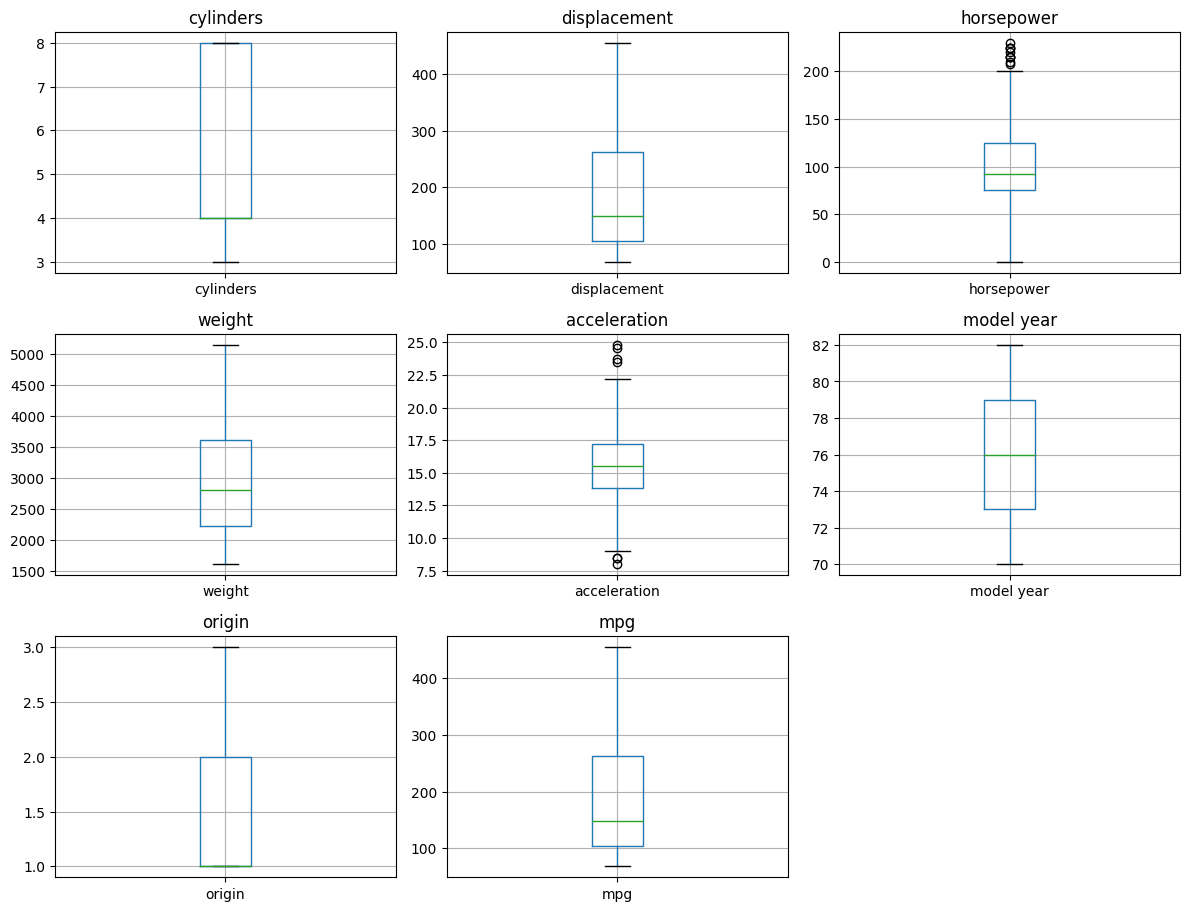

In [23]:
# 데이터 프레임의 열 수
num_columns = len(df2.columns)

#그래프의 크기 설정
plt.figure(figsize=(12,12))

# 각 열에 대한 박스플롯을 그립니다.
for i, column in enumerate(df2.columns):
    plt.subplot(4, 3, i+1)
    df2.boxplot(column = column)
    plt.title(column)

# 레이아웃을 조정
plt.tight_layout()
plt.show()

In [24]:
# 타겟 변수와 상관관계가 높은 변수 선택 (절대값 기준으로 상위 n개 선택)
target_variable = 'mpg'
correlation_threshold = 0.5
correlation_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) >
                                                            correlation_threshold].index.tolist()

# 선택된 변수 출력
print(f'Variables highly correlated with {target_variable}: {correlation_features}')

Variables highly correlated with mpg: ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin', 'mpg']


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 31.1+ KB


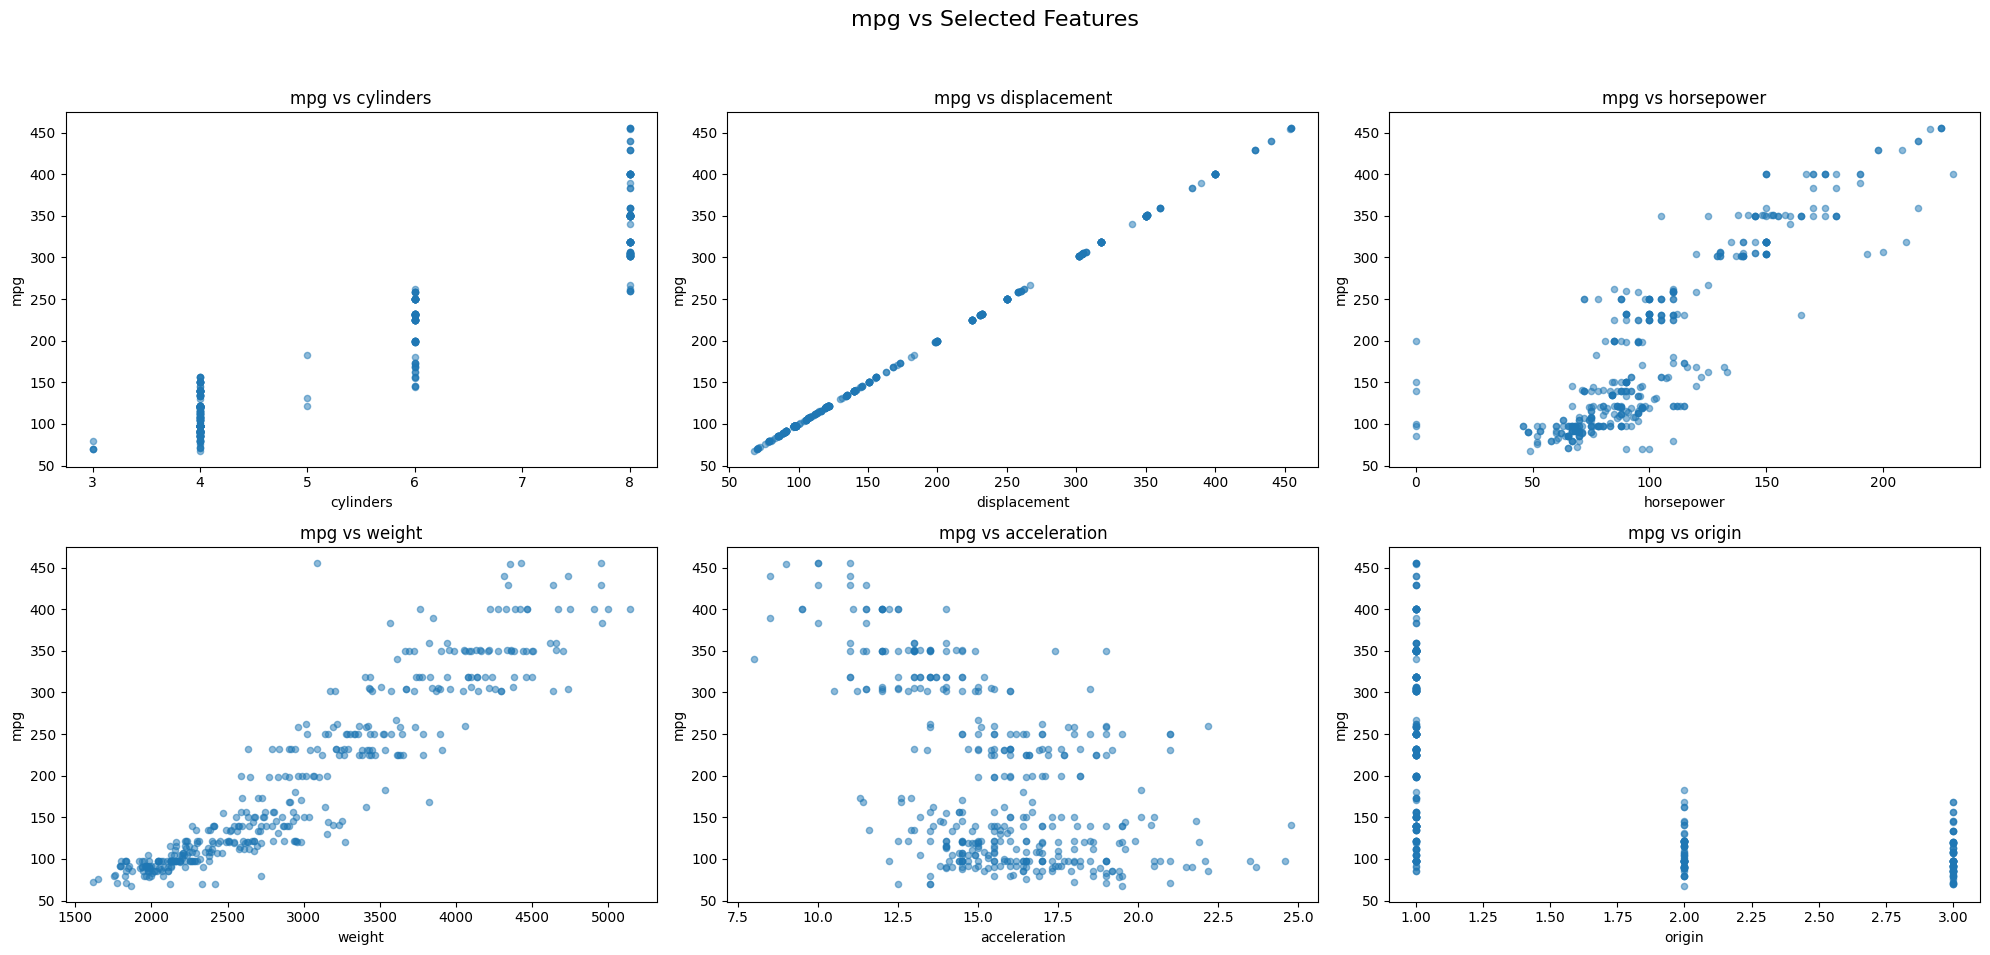

In [26]:
# 분석할 칼럼들
columns = ['cylinders','displacement','horsepower','weight','acceleration','origin']
target = 'mpg'

# 2행 4열의 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

# 각 subplot에 산점도 그리기.
for i, col in enumerate(columns):
    row, col_idx = divmod(i,3) # 그래프 자리지정.
    df2.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')
#전체 제목 설정
fig.suptitle(f'{target} vs Selected Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

correlated_features = ['cylinders','displacement','horsepower','weight','acceleration','origin']
# 분석용 데이터셋 구축
analysis_df = df2[correlated_features]
target_variable = 'mpg'

# 데이터프레임에서 'mpg' 열을 인덱스에서 다시 데이터 열로 이동
analysis_df.reset_index(inplace=True)

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

   cylinders  displacement  horsepower    weight  acceleration    origin   mpg
0   1.498191      1.090604    0.673950  0.630870     -1.295498 -0.715145  18.0
1   1.498191      1.503514    1.544187  0.854333     -1.477038 -0.715145  15.0
2   1.498191      1.196232    1.171228  0.550470     -1.658577 -0.715145  18.0
3   1.498191      1.061796    1.171228  0.546923     -1.295498 -0.715145  16.0
4   1.498191      1.042591    0.922589  0.565841     -1.840117 -0.715145  17.0


           cylinders       mpg
cylinders   1.000000  0.950721
mpg         0.950721  1.000000 



<ipython-input-28-ef4d3c62b843>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cylinders', y='mpg', ci=None, data=df)


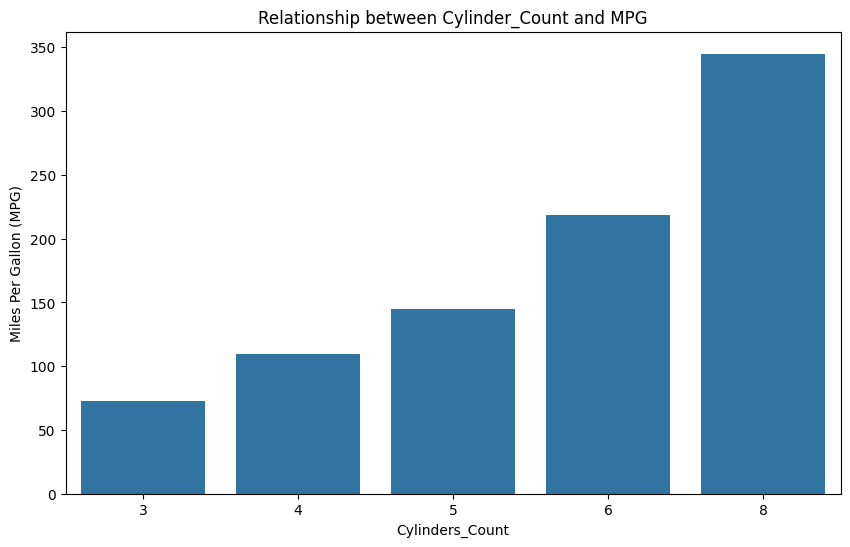

In [28]:
# 실린더 개수(cyl)와 연비(mpg) 상관관계
cyl_mpg_corr = df[['cylinders', 'mpg']].corr()
print(cyl_mpg_corr,'\n')

plt.figure(figsize=(10, 6))
sns.barplot(x='cylinders', y='mpg', ci=None, data=df)
plt.title('Relationship between Cylinder_Count and MPG')
plt.xlabel('Cylinders_Count')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()


In [29]:
# 실린더 개수(cyl)와 연비(mpg) Test

# 회귀 모델 구축
X = df[['cylinders']]
y = df['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 1235.16
Root Mean Squared Error: 35.14
R-squared: 0.9


            horsepower       mpg
horsepower    1.000000  0.871927
mpg           0.871927  1.000000 



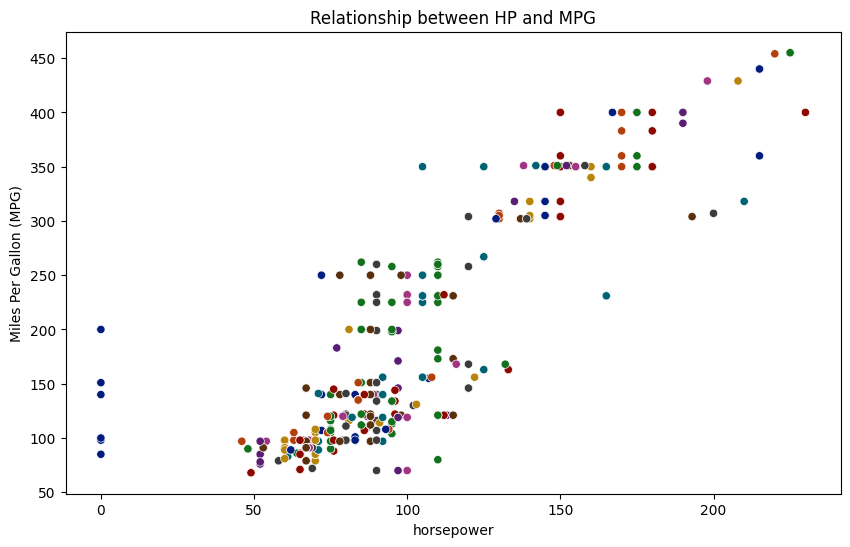

In [35]:
# 마력(hp)와 연비(mpg) 상관관계
hp_mpg_corr = df[['horsepower', 'mpg']].corr()
print(hp_mpg_corr,'\n')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', hue='horsepower', palette='dark', data=df, legend=False)
plt.title('Relationship between HP and MPG')
plt.xlabel('horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

In [36]:
# 마력(hp)와 연비(mpg) Test

# 회귀 모델 구축
X = df[['horsepower']]
y = df['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 2487.01
Root Mean Squared Error: 49.87
R-squared: 0.79


          weight       mpg
weight  1.000000  0.932824
mpg     0.932824  1.000000 



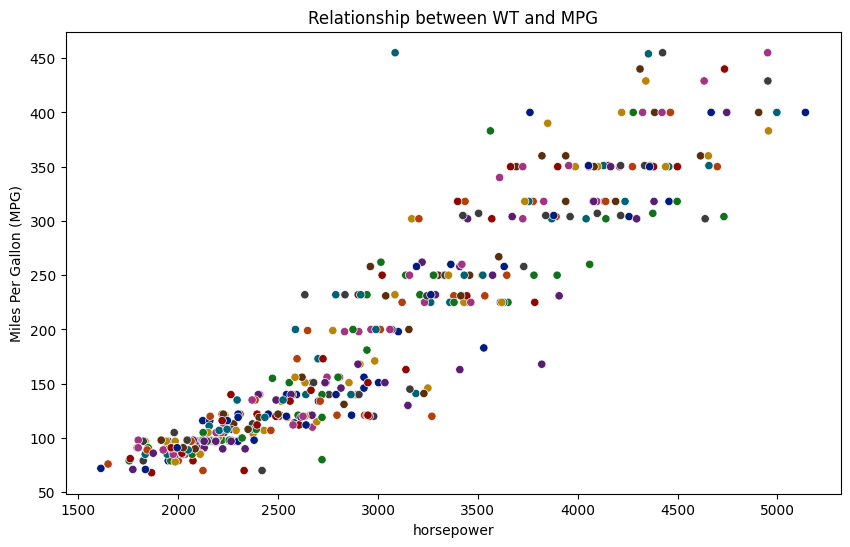

In [37]:
# 무게(wt)와 연비(mpg) 상관관계
hp_mpg_corr = df[['weight', 'mpg']].corr()
print(hp_mpg_corr,'\n')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', hue='weight', palette='dark', data=df, legend=False)
plt.title('Relationship between WT and MPG')
plt.xlabel('weight')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

In [38]:
# 무게(wt)와 연비(mpg) Test

# 회귀 모델 구축
X = df[['weight']]
y = df['mpg']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"Root Mean Squared Error: {round(rmse,2)}")
print(f"R-squared: {round(r2,2)}")

Mean Squared Error: 1299.66
Root Mean Squared Error: 36.05
R-squared: 0.89
